In [1]:
import pandas as pd
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
import datetime

In [15]:
sales= pd.read_csv("C:\\Users\\melchiz shroff\\Downloads\\shampoo_sales.csv", header=0, parse_dates=[0],
index_col=0, squeeze=True)

In [16]:
sales.head()

Month
2001-01-01    266.0
2001-01-02    145.9
2001-01-03    183.1
2001-01-04    119.3
2001-01-05    180.3
Name: Sales, dtype: float64

In [18]:
sales.index

DatetimeIndex(['2001-01-01', '2001-01-02', '2001-01-03', '2001-01-04',
               '2001-01-05', '2001-01-06', '2001-01-07', '2001-01-08',
               '2001-01-09', '2001-01-10', '2001-01-11', '2001-01-12',
               '2002-01-01', '2002-01-02', '2002-01-03', '2002-01-04',
               '2002-01-05', '2002-01-06', '2002-01-07', '2002-01-08',
               '2002-01-09', '2002-01-10', '2002-01-11', '2002-01-12',
               '2003-01-01', '2003-01-02', '2003-01-03', '2003-01-04',
               '2003-01-05', '2003-01-06', '2003-01-07', '2003-01-08',
               '2003-01-09', '2003-01-10', '2003-01-11', '2003-01-12'],
              dtype='datetime64[ns]', name='Month', freq=None)

In [19]:
series= sales.copy()

In [22]:
series

Month
2001-01-01    266.0
2001-01-02    145.9
2001-01-03    183.1
2001-01-04    119.3
2001-01-05    180.3
2001-01-06    168.5
2001-01-07    231.8
2001-01-08    224.5
2001-01-09    192.8
2001-01-10    122.9
2001-01-11    336.5
2001-01-12    185.9
2002-01-01    194.3
2002-01-02    149.5
2002-01-03    210.1
2002-01-04    273.3
2002-01-05    191.4
2002-01-06    287.0
2002-01-07    226.0
2002-01-08    303.6
2002-01-09    289.9
2002-01-10    421.6
2002-01-11    264.5
2002-01-12    342.3
2003-01-01    339.7
2003-01-02    440.4
2003-01-03    315.9
2003-01-04    439.3
2003-01-05    401.3
2003-01-06    437.4
2003-01-07    575.5
2003-01-08    407.6
2003-01-09    682.0
2003-01-10    475.3
2003-01-11    581.3
2003-01-12    646.9
Name: Sales, dtype: float64

In [23]:
series.head()

Month
2001-01-01    266.0
2001-01-02    145.9
2001-01-03    183.1
2001-01-04    119.3
2001-01-05    180.3
Name: Sales, dtype: float64

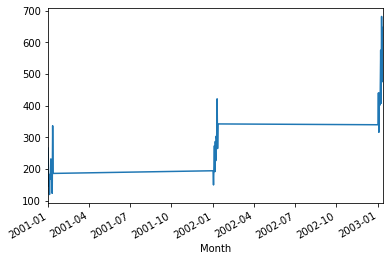

In [24]:
series.plot()
pyplot.show()

In [25]:
# fit model
model = ARIMA(series, order=(5,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

C:\Users\melchiz shroff\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\melchiz shroff\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                D.Sales   No. Observations:                   35
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -196.170
Method:                       css-mle   S.D. of innovations             64.241
Date:                Sat, 17 Oct 2020   AIC                            406.340
Time:                        21:59:59   BIC                            417.227
Sample:                             1   HQIC                           410.098
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            12.0649      3.652      3.304      0.003       4.908      19.222
ar.L1.D.Sales    -1.1082      0.183     -6.063      0.000      -1.466      -0.750
ar.L2.D.Sales    -0.6203      0.282     

In [26]:
X = series.values
X

array([266. , 145.9, 183.1, 119.3, 180.3, 168.5, 231.8, 224.5, 192.8,
       122.9, 336.5, 185.9, 194.3, 149.5, 210.1, 273.3, 191.4, 287. ,
       226. , 303.6, 289.9, 421.6, 264.5, 342.3, 339.7, 440.4, 315.9,
       439.3, 401.3, 437.4, 575.5, 407.6, 682. , 475.3, 581.3, 646.9])

In [27]:
size = int(len(X) * 0.66)

In [28]:
train, test = X[0:size], X[size:len(X)]

In [29]:
history = [x for x in train]

In [30]:
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

predicted=349.117793, expected=342.300000
predicted=306.512947, expected=339.700000
predicted=387.376475, expected=440.400000
predicted=348.154206, expected=315.900000
predicted=386.308816, expected=439.300000
predicted=356.082003, expected=401.300000
predicted=446.379451, expected=437.400000
predicted=394.737308, expected=575.500000
predicted=434.915490, expected=407.600000
predicted=507.923462, expected=682.000000
predicted=435.482756, expected=475.300000
predicted=652.743802, expected=581.300000
predicted=546.343484, expected=646.900000
Test MSE: 6958.325


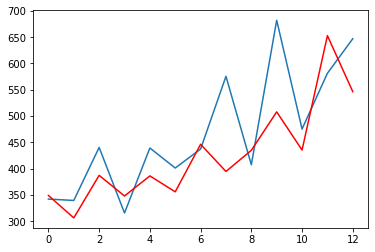

In [31]:
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()